In [1]:
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Read pickle data

In [2]:
with open('./data/titanic.pkl', 'rb') as f:
   X_titanic_train, y_titanic_train, X_titanic_test, y_titanic_test = pickle.load(f)

In [3]:
X_titanic_train

,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3,Cabin_1,Cabin_2,Cabin_3,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Cabin_9,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2
0,22.0,1,0,18,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,38.0,1,0,207,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,26.0,0,0,41,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,35.0,1,0,189,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,35.0,0,0,43,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,85,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,19.0,0,0,153,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
888,21.5,1,2,131,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
889,26.0,0,0,153,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
y_titanic_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Tuning

In [5]:
X_titanic = np.concatenate((X_titanic_train, X_titanic_test), axis=0)
y_titanic = np.concatenate((y_titanic_train, y_titanic_test), axis=0)

In [6]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10, 15, 20, 25],
              'min_samples_leaf': [1, 5, 10, 15, 20, 25]}

In [7]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(splitter='random'), param_grid=params)
grid_search.fit(X_titanic, y_titanic)
best_param = grid_search.best_params_
best_result = grid_search.best_score_

print("Best Param: {} and Best Socore: {}".format(best_param, best_result))

Best Param: {'criterion': 'log_loss', 'min_samples_leaf': 20, 'min_samples_split': 15, 'splitter': 'random'} and Best Socore: 0.8679330818051534


# Treinamento

In [8]:
decision_tree = DecisionTreeClassifier(
   criterion=best_param['criterion'],
   min_samples_leaf=best_param['min_samples_leaf'],
   min_samples_split=best_param['min_samples_split'],
   splitter='random'
)
decision_tree.fit(X_titanic_train, y_titanic_train)

DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=20,
                       min_samples_split=15, splitter='random')

# Avaliação dos resultados

In [9]:
predictors = decision_tree.predict(X_titanic_test)

In [10]:
accuracy_score(y_titanic_test, predictors)

0.8732057416267942

/home/romulo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8732057416267942

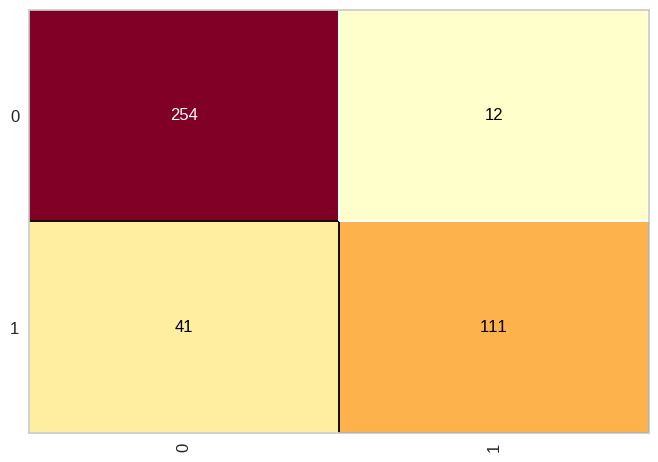

In [11]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_titanic_train, y_titanic_train)
cm.score(X_titanic_test, y_titanic_test)

In [12]:
print(classification_report(y_titanic_test, predictors))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       266
           1       0.90      0.73      0.81       152

    accuracy                           0.87       418
   macro avg       0.88      0.84      0.86       418
weighted avg       0.88      0.87      0.87       418



Informa que 48 pessoas que *iriam sobreviver* *não sobreviveram* (FP)
Informa que 42 pessoas que *morrem* ficam *vivas* (FN)

Possui uma taxa de 77% de acertos

- Acerta 82% de 0 e desses 84% estão certos
- Acerta 72% de 1 e desses 69% estão certos 